In [135]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib
import spacy
import itertools
import seaborn as sns
import gensim
import matplotlib.pyplot as plt
matplotlib.rcParams['axes.linewidth'] = 3
import numpy

from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from IPython.display import display, clear_output
from nltk.stem.snowball import SnowballStemmer
from sklearn.externals import joblib

In [136]:
#load ingredient db for allrecipes 
db = pd.read_csv('allrecipes_ingreds_db_all.csv', encoding = "ISO-8859-1")
db = db.drop(columns=['Unnamed: 0'])
db = db.set_index('recipename')
print(len(np.unique(db.index)))

db.head()
# db.tail()

4788


,ingredients
recipename,
a good easy garlic chicken,3 tablespoons butter
a good easy garlic chicken,"4 skinless, boneless chicken breast halves"
a good easy garlic chicken,2 teaspoons garlic powder
a good easy garlic chicken,1 teaspoon seasoning salt
a good easy garlic chicken,1 teaspoon onion powder


In [137]:
#remove numbers from ingredients
remove_leading_dig = re.compile('[^A-Za-z\s]')
db['ingredients'] = db['ingredients'].apply(lambda x: re.sub(remove_leading_dig,'',x).strip()) 
db.head()

,ingredients
recipename,
a good easy garlic chicken,tablespoons butter
a good easy garlic chicken,skinless boneless chicken breast halves
a good easy garlic chicken,teaspoons garlic powder
a good easy garlic chicken,teaspoon seasoning salt
a good easy garlic chicken,teaspoon onion powder


In [138]:
#remove common measurement words
measurements = ['spoon','pound','cup','quart','ounce','pint','degree','dash','pinch','pack','halve','bunch']
for term in measurements:
    expr = re.compile('\w*'+term+'\w*')
    db['ingredients'] = db['ingredients'].apply(lambda x: re.sub(expr,'',x).strip())
db.head()
# db.tail(100)

,ingredients
recipename,
a good easy garlic chicken,butter
a good easy garlic chicken,skinless boneless chicken breast
a good easy garlic chicken,garlic powder
a good easy garlic chicken,seasoning salt
a good easy garlic chicken,onion powder


In [139]:
# keep only the ingredients

stopwords = ['chopped','cut','divided','minced','seeded','chunks','finely','diced','beaten','peeled','cooked','shredded',
            'taste','melted','small','grated','slices','large','medium','thinly','sliced','slice','plain','skinless','boneless',
            'mild','light','can','rinsed','drained','removed','distilled','quick','cooking','bottle','chunky','crushed',
            'thawed','allpurpose','juiced','dried','dry','crumble','crumbled','uncooked','optional','coarsely','coarse',
            'thick','inch','jar','lowsodium','sodium','high','low','flatcut','seeded','lean','clove','cloves','cubed',
            'envelope','head','longgrain','prepare','prepared','frozen','skinon','bonein','kosher','pieces','piece','sprig',
            'sprigs','beaten','very','bulk','half','halves','drain','needed','frying','fried','prebaked','container',
            'processed','substitute','reducedfat','reduce','reduced','extravirgin','sticks','stick','squares','square','wedge',
            'wedges','ingredients','ingredient','fatfree','lengthwise','length','heavy','instant','deveined','strip','strips',
            'clarified','stalks','stalk','skim','partskim','pitted','julienned','portion','portions','standing','washed','whole',
            'topping','gallon','jars','bottles','refrigerated','refrigerate','spray','cooking','box','boxes','thawed','fresh',
            'rubbed','dissolved','dissolve','aged','zest','zested','dredging','thin','extra','inchthick','lightly','bitesize',
            'top','tops','floret','florets','freshly','fluid','split','creamy','slightly','cored','core','cores','mix','mashed',
            'reserved','reserves','soft','softened','wide','flaked','unsalted','salted','canned','soaked','to','and','in',
            'mixed','fl','oz','raw','for','into','of','liquid','from','sharp','such','as','more','or','eg','serving','blend',
            'blended','smoked','containers','preferably','pure','dusting','with','no','msg','bite','size','thickness','separate',
            'separated','stewed','unbaked','freshground','rapidrise','envelop','envelopes','toppings','fully','full','simmered',
            'see','note','up','your','favorite','toasted','mini','wooden','drops','the','a','an','hard', 'then', 'f','ground']

In [140]:
db['ingredients'] = db['ingredients'].apply(lambda x: ' '.join([i.lower() for i in x.split(' ') if i.lower() not in stopwords]))

In [141]:
# db.tail(100)
db.head()

,ingredients
recipename,
a good easy garlic chicken,butter
a good easy garlic chicken,chicken breast
a good easy garlic chicken,garlic powder
a good easy garlic chicken,seasoning salt
a good easy garlic chicken,onion powder


In [142]:
# remove multiple spaces into one space
db['ingredients'] = db['ingredients'].apply(lambda x: ' '.join(x.split()))

# remove space in the lead space and tail space of ingredients
remove_leading_space = re.compile('^\s*')
db['ingredients'] = db['ingredients'].apply(lambda x: re.sub(remove_leading_space,'',x))
remove_tail_space = re.compile('\s*$')
db['ingredients'] = db['ingredients'].apply(lambda x: re.sub(remove_tail_space,'',x))

In [143]:
#stem the ingredients
stemmer = SnowballStemmer("english")
db['ingredient'] = db['ingredients'].apply(lambda x: ' '.join([stemmer.stem(i) for i in x.split(' ')]))
db.head()

,ingredients,ingredient
recipename,,
a good easy garlic chicken,butter,butter
a good easy garlic chicken,chicken breast,chicken breast
a good easy garlic chicken,garlic powder,garlic powder
a good easy garlic chicken,seasoning salt,season salt
a good easy garlic chicken,onion powder,onion powder


In [144]:
db.head(100)

,ingredients,ingredient
recipename,,
a good easy garlic chicken,butter,butter
a good easy garlic chicken,chicken breast,chicken breast
a good easy garlic chicken,garlic powder,garlic powder
a good easy garlic chicken,seasoning salt,season salt
a good easy garlic chicken,onion powder,onion powder
a jerky chicken,onion,onion
a jerky chicken,brown sugar,brown sugar
a jerky chicken,soy sauce,soy sauc
a jerky chicken,red wine vinegar,red wine vinegar


In [145]:
#prep ingredient list into recipe documents for training
recipetext = []
recipenames = []
for name in np.unique(db.index):
    recipetext.append((' '.join([x for x in db.loc[name].ingredient])).split())
    recipenames.append(name)
print(recipetext)
# db.head()

[['batter', 'mazola', 'flour', 'fleischmann', 'yeast', 'sugar', 'salt', 'warm', 'water', 'oliv', 'oil', 'bread', 'chicken', 'breast', 'tender', 'spaghetti', 'sauc', 'italian', 'chees', 'spice', 'island', 'italian', 'herb', 'season'], ['batter', 'mazola', 'flour', 'fleischmann', 'yeast', 'sugar', 'salt', 'warm', 'water', 'oliv', 'oil', 'pizza', 'sauc', 'pepperoni', 'mozzarella', 'chees'], ['petit', 'pea', 'smokeflavor', 'almond', 'onion', 'mayonnais', 'black', 'pepper'], ['veget', 'oil', 'chicken', 'breast', 'campbel', 'condens', 'cream', 'chicken', 'herb', 'soup', 'milk', 'broth', 'rice'], ['veget', 'oil', 'chicken', 'breast', 'bag', 'pasta', 'veget', 'campbel', 'cream', 'soup', 'water'], ['butter', 'margarin', 'chicken', 'breast', 'broccoli', 'floweret', 'campbel', 'condens', 'cream', 'chicken', 'soup', 'regular', 'fat', 'free', 'milk', 'cheddar', 'chees'], ['oliv', 'oil', 'red', 'onion', 'zucchini', 'yellow', 'squash', 'carrot', 'red', 'bell', 'pepper', 'yellow', 'bell', 'pepper', 'b

In [146]:
type(recipetext)

list

In [147]:
recipetext_sum = [item for sublist in recipetext for item in sublist]


In [148]:
# replace star with space
# remove_star = re.compile('\*')
# recipetext_sum = list(map(lambda x: re.sub(remove_star,' ',x), recipetext_sum)) 

In [149]:

recipetext = sorted(list(set(recipetext_sum)))

In [150]:
recipetext

['a',
 'about',
 'accent',
 'accord',
 'achiot',
 'acorn',
 'across',
 'activ',
 'activedri',
 'adam',
 'addit',
 'adobo',
 'ahi',
 'aioli',
 'aji',
 'al',
 'alaskan',
 'albacor',
 'ale',
 'aleppo',
 'alfalfa',
 'alfredo',
 'alfredostyl',
 'all',
 'allbeef',
 'allspic',
 'almond',
 'along',
 'aluminum',
 'amarillo',
 'amber',
 'american',
 'amount',
 'anaheim',
 'ancho',
 'anchovi',
 'andouill',
 'angel',
 'ani',
 'anis',
 'annatto',
 'anoth',
 'apart',
 'appl',
 'applegrapecherri',
 'applesauc',
 'applic',
 'apricot',
 'arborio',
 'arctic',
 'are',
 'arrowroot',
 'artichok',
 'artifici',
 'artisan',
 'arugula',
 'asadero',
 'asafoetida',
 'asiago',
 'asian',
 'asianstyl',
 'asid',
 'asparagus',
 'assort',
 'at',
 'attach',
 'au',
 'avocado',
 'b',
 'babi',
 'back',
 'backfin',
 'bacon',
 'bag',
 'bagel',
 'baguett',
 'bake',
 'bakeri',
 'balanc',
 'ball',
 'balsam',
 'bamboo',
 'banana',
 'barbecu',
 'barbequ',
 'barberri',
 'barilla',
 'barley',
 'barrel',
 'bartlett',
 'base',
 'bas

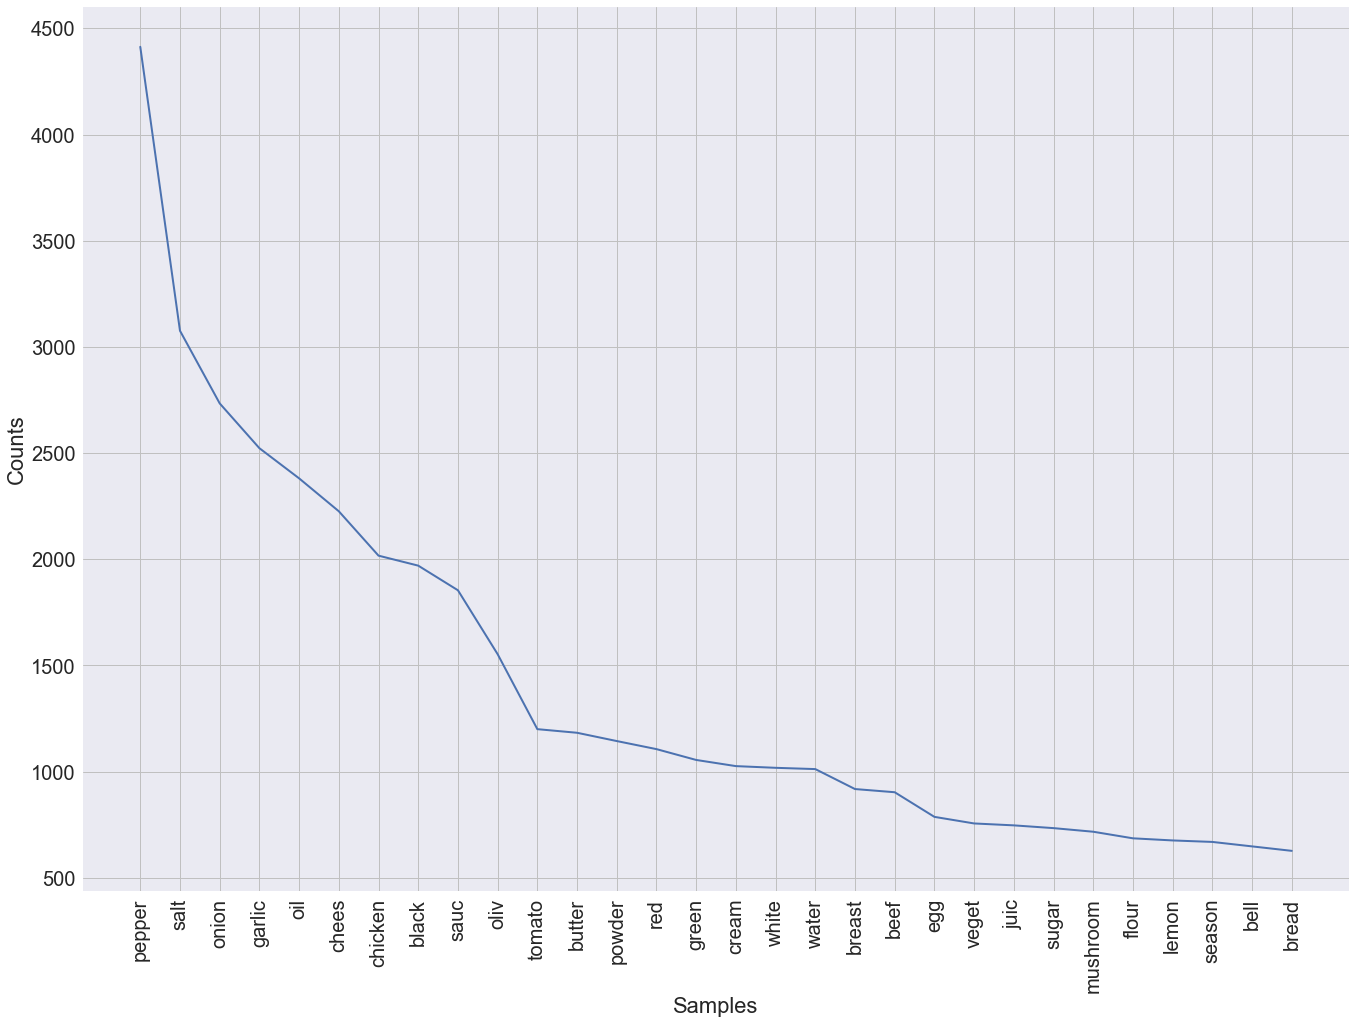

In [151]:
from scipy import ndimage

sns.set(rc={'figure.figsize':(22.7, 16.27)})
sns.set_style('white')
sns.set(font_scale=2) 
# sns.set(orientation=u'vertical')
nlp_words = nltk.FreqDist(recipetext_sum)
nlp_words.plot(30)


In [152]:
df = pd.DataFrame.from_dict(nlp_words, orient='index').reset_index()
df.head(10)

,index,0
0,batter,5
1,mazola,8
2,flour,686
3,fleischmann,7
4,yeast,47
5,sugar,734
6,salt,3076
7,warm,83
8,water,1012
9,oliv,1553


In [153]:
df = df.rename(columns=({'index':'ingredient', 0: 'count'}))
df.head(10)
df = df.sort_values("count", ascending=False)
df.shape

(1755, 2)

AttributeError: Unknown property rc

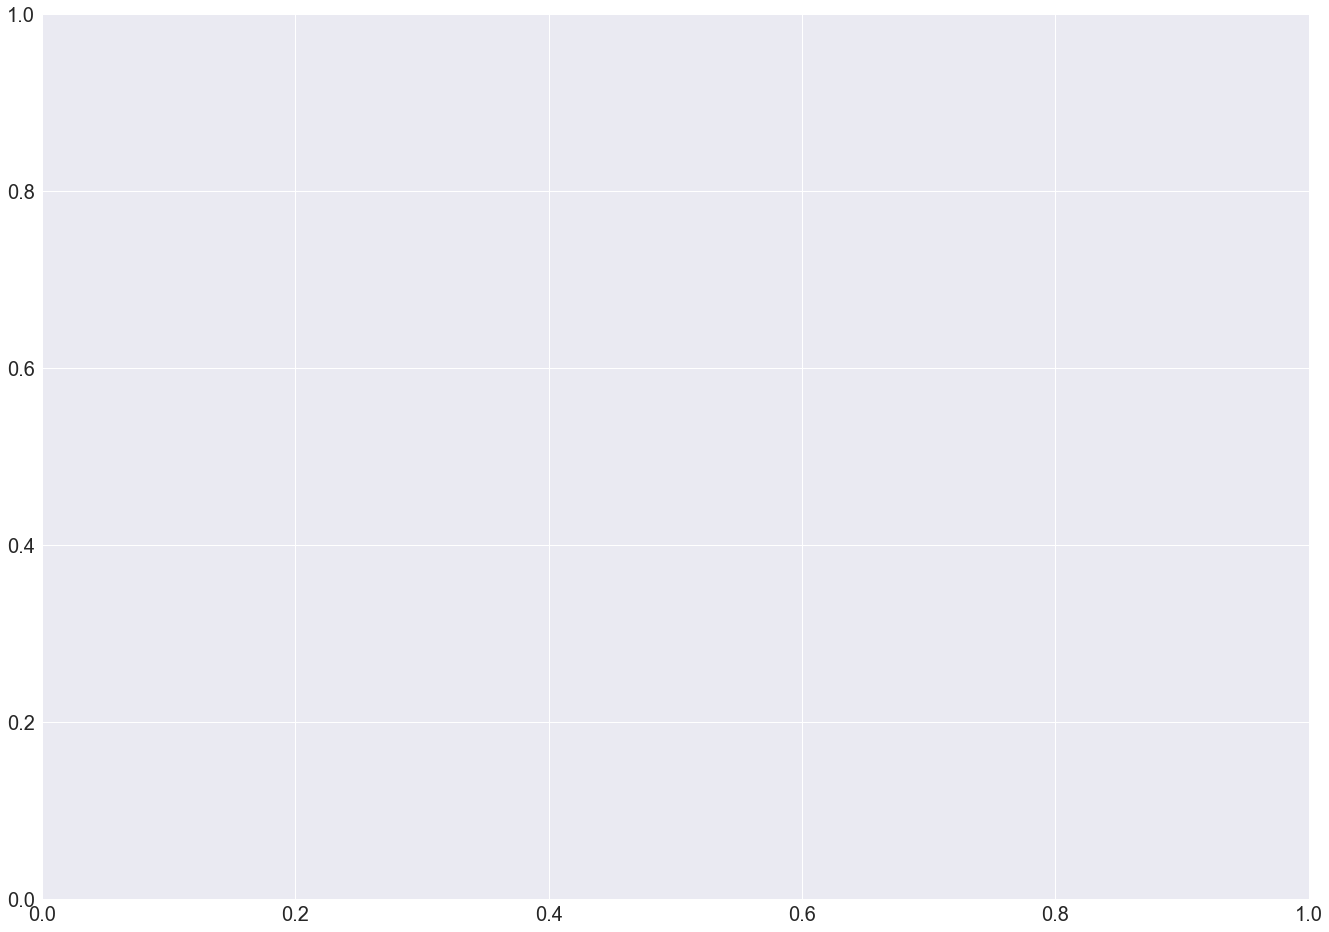

In [185]:
# df_sns = sns.load_dataset(df)
bar_ingredient = sns.barplot(x="count", y="ingredient", data=df.iloc[0:15],rc={"axes.labelsize":36},
            label="Ingredient Frequency", color="g").set_title('Popularity of Ingredients')
bar_ingredient.figure.savefig("Popularity of Ingredient.jpg")



Text(0.5,1,'Popularity of Ingredients')

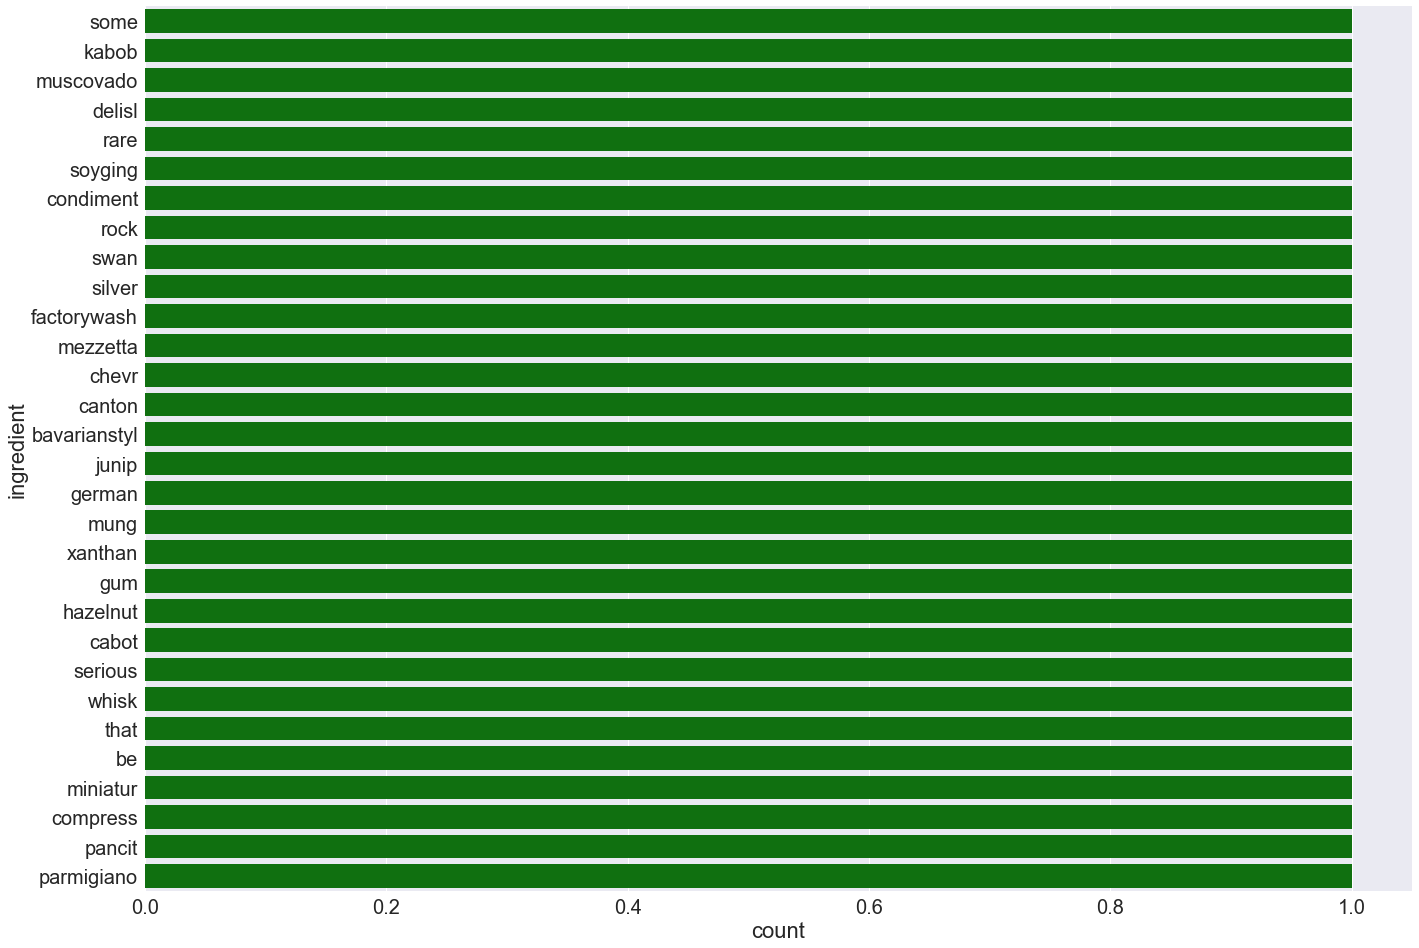

In [155]:
# df_sns = sns.load_dataset(df)
sns.barplot(x="count", y="ingredient", data=df.tail(30),
            label="Ingredient Frequency", color="g")

In [156]:
recipetext = sorted(list(set(recipetext)))
# print(type(recipetext))
# set(recipetext)

In [157]:
len(recipetext)

1755

In [158]:
recipetext

['a',
 'about',
 'accent',
 'accord',
 'achiot',
 'acorn',
 'across',
 'activ',
 'activedri',
 'adam',
 'addit',
 'adobo',
 'ahi',
 'aioli',
 'aji',
 'al',
 'alaskan',
 'albacor',
 'ale',
 'aleppo',
 'alfalfa',
 'alfredo',
 'alfredostyl',
 'all',
 'allbeef',
 'allspic',
 'almond',
 'along',
 'aluminum',
 'amarillo',
 'amber',
 'american',
 'amount',
 'anaheim',
 'ancho',
 'anchovi',
 'andouill',
 'angel',
 'ani',
 'anis',
 'annatto',
 'anoth',
 'apart',
 'appl',
 'applegrapecherri',
 'applesauc',
 'applic',
 'apricot',
 'arborio',
 'arctic',
 'are',
 'arrowroot',
 'artichok',
 'artifici',
 'artisan',
 'arugula',
 'asadero',
 'asafoetida',
 'asiago',
 'asian',
 'asianstyl',
 'asid',
 'asparagus',
 'assort',
 'at',
 'attach',
 'au',
 'avocado',
 'b',
 'babi',
 'back',
 'backfin',
 'bacon',
 'bag',
 'bagel',
 'baguett',
 'bake',
 'bakeri',
 'balanc',
 'ball',
 'balsam',
 'bamboo',
 'banana',
 'barbecu',
 'barbequ',
 'barberri',
 'barilla',
 'barley',
 'barrel',
 'bartlett',
 'base',
 'bas


# Bag of words
## TF-IDF

In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords, vocabulary=recipetext)
tfidf_matrix = tfidf_vectorizer.fit_transform(np.asarray(recipenames)).todense()

dist = 1 - cosine_similarity(tfidf_matrix)
print


<function print>

In [160]:
dist.shape

(4788, 4788)

In [161]:
print(type(tfidf_matrix))
tfidf_matrix.shape

<class 'numpy.matrixlib.defmatrix.matrix'>


(4788, 1755)

## NMF

In [162]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck <L.J.Buitinck@uva.nl>
# License: BSD 3 clause

from sklearn.decomposition import NMF

n_samples = len(tfidf_matrix)
n_features = len(tfidf_matrix[0])
n_topics = 5
n_top_words = 100

# Fit the NMF model
print("Fitting the NMF model with n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
nmf = NMF(n_components=n_topics, random_state=1).fit(tfidf_matrix)

feature_names = tfidf_vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Fitting the NMF model with n_samples=4788 and n_features=1...
Topic #0:
chicken garlic rice honey parmesan broccoli lemon style thai bbq cream lime pesto pasta mushroom teriyaki pizza best bacon buffalo bake ranch marsala red mustard breast tomato asparagus alfredo soup butter oven herb sandwich sweet lasagna greek coconut italian southern green basil sour spinach jerk peanut pepper adobo swiss beer wine spaghetti chili asian mango salsa indian cheddar roast la mozzarella skillet tarragon white cilantro sun sriracha pie hot eggplant summer dijon on mexican soy korean dinner ginger caribbean orzo feta deep king almond vinegar bourbon wild masala prosciutto fingers portobello avocado tortilla bean couscous good paprika yogurt tender squash

Topic #1:
pork tenderloin roast loin sweet chop honey bbq bacon style onion garlic sour rice italian mushroom sauerkraut mustard cream wine ginger herb marsala southern mexican fennel plum dijon shrimp sage lemon oven peanut black port beer potato chi

## K-mean Clustering

In [163]:

from sklearn.cluster import KMeans

num_clusters = 10

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()


CPU times: user 17.9 s, sys: 376 ms, total: 18.2 s
Wall time: 4.57 s


In [164]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()


In [165]:
inertia = km.inertia_
inertia

3515.946447472865

In [166]:
df_cluster = pd.DataFrame({'recipename': recipenames,'labels': clusters})
df_cluster = df_cluster.set_index('recipename')
df_cluster.head()

,labels
recipename,
1 dish chicken parmesan,4
1 dish pepperoni cheese pizza bake,4
1 pea salad most requested,3
15 minute herbed chicken,6
2 step creamy chicken and pasta,7


In [167]:
cernters = km.cluster_centers_

In [168]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
matrix_centroids = np.asmatrix(order_centroids)

In [169]:
order_centroids.shape

(10, 1755)

In [170]:
type(order_centroids)

numpy.ndarray

In [171]:
from scipy.spatial.distance import pdist, squareform

distances = pdist(matrix_centroids, metric='euclidean')
dist_matrix = squareform(distances)


In [172]:
# get the proper cluster that fit the user's requirement

# user input on how much the similarity they want
lamda = 0.5   # input between [0,1]
cluster_input = 4   # input between [0,9], the numbers of clusters.

# get the cluster index based on user's input
dist_matrix_norm = normalize(dist_matrix, axis=1, norm='l1').transpose()
dist_matrix_transpose = dist_matrix_norm.transpose()


# check
a = [row[1] for row in dist_matrix_transpose]
cluster_option = min(enumerate(a), key=lambda x: abs(x[1]-lamda))
   

# save for the use on allrecipes_Healthy_Index_one_input.ipynb.
numpy.savetxt("dist_matrix_transpose.csv", dist_matrix_transpose, delimiter=",")


In [173]:
dist_matrix_transpose

array([[0.        , 0.10607557, 0.10849607, 0.10804736, 0.13521215,
        0.10608529, 0.10589275, 0.11221931, 0.09942259, 0.11854892],
       [0.1042396 , 0.        , 0.10393156, 0.10868887, 0.13496494,
        0.10551093, 0.11167647, 0.10996161, 0.10494019, 0.11608585],
       [0.10600971, 0.10333841, 0.        , 0.10435571, 0.13693864,
        0.10588066, 0.11103379, 0.11111337, 0.10626721, 0.1150625 ],
       [0.10542638, 0.10792023, 0.10421247, 0.        , 0.13483377,
        0.1057183 , 0.11104858, 0.11099789, 0.10427942, 0.11556296],
       [0.10839715, 0.11010468, 0.11235606, 0.11078111, 0.        ,
        0.11291796, 0.11107425, 0.11222864, 0.10905524, 0.1130849 ],
       [0.10360078, 0.10485471, 0.1058261 , 0.10580907, 0.13755257,
        0.        , 0.10831477, 0.11269649, 0.10692403, 0.11442148],
       [0.10246584, 0.10996569, 0.10996041, 0.11012623, 0.13406769,
        0.10732297, 0.        , 0.11231194, 0.0996291 , 0.11415013],
       [0.10598385, 0.10568075, 0.1074006

In [174]:
#load ingredient db for allrecipes 
db = pd.read_csv('allrecipes_nutr_labels.csv', encoding = "ISO-8859-1")
# db = db.drop(columns=['Unnamed: 0'])
db = db.set_index('recipename')
print(len(np.unique(db.index)))

db.head()
# db.tail()

# merge cluster into the nutrition dataset
recipe_final = pd.concat([df_cluster, db], axis=1, join='inner')

recipe_final.to_csv('recipe_final.csv')


4788


In [131]:
recipe_final.head()


,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,Sugars,...,Iron,Thiamin,Niacin,Vitamin B6,Magnesium,Folate,Calories,Health Score,ratings,class_prob
recipename,,,,,,,,,,,,,,,,,,,,,
1 dish chicken parmesan,0,0.253846,0.25,0.216667,0.309167,0.131714,0.125333,0.124,0.536,0.285714,...,0.166667,0.0,0.85,0.5,0.1200,0.1775,412,-2.303607,4.093571,0.817866
1 dish pepperoni cheese pizza bake,0,0.230769,0.30,0.113333,0.288333,0.027714,0.107333,0.052,0.306,0.095238,...,0.111111,0.0,0.30,0.0,0.0475,0.1775,329,-3.592734,4.548874,0.811078
1 pea salad most requested,2,0.412308,0.15,0.026667,0.117917,0.080000,0.058000,0.240,0.176,0.190476,...,0.111111,0.0,0.15,0.0,0.1825,0.1400,333,-1.992816,4.149361,0.987261
15 minute herbed chicken,4,0.138462,0.10,0.243333,0.237083,0.070857,0.023333,0.048,0.534,0.063492,...,0.055556,0.0,0.80,0.0,0.0650,0.0125,225,0.738758,4.338405,0.947147
2 step creamy chicken and pasta,2,0.178462,0.15,0.266667,0.260000,0.040571,0.101667,0.172,0.578,0.126984,...,0.055556,0.0,0.55,0.0,0.0475,0.0050,340,-0.303774,4.113393,0.756919


NameError: name 'alist' is not defined

In [132]:
df_cluster = df_cluster.reset_index()

In [133]:
df_cluster.head()

,recipename,labels
0,1 dish chicken parmesan,0
1,1 dish pepperoni cheese pizza bake,0
2,1 pea salad most requested,2
3,15 minute herbed chicken,4
4,2 step creamy chicken and pasta,2


In [134]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d Ingredients:" % i, end='')
    
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        print(' %s' % recipetext[ind], end='')
    print() #add whitespace
    
    print("Cluster %d Recipes:" % i, end='\n')
    for recipe in df_cluster[df_cluster['labels'] == i]['recipename'].values.tolist()[0:5]:
        print(' %s,' % recipe, end='\n')
    print() #add whitespace
    
print()

Top terms per cluster:

Cluster 0 Ingredients: chicken turkey rice salmon steak pizza sandwich lasagna ham garlic italian tilapia style mushroom bacon fish spaghetti roast lemon lamb
Cluster 0 Recipes:
 1 dish chicken parmesan,
 1 dish pepperoni cheese pizza bake,
 2 step skillet chicken broccoli divan,
 25 minute tunisian vegetable couscous,
 3 cheese eggplant lasagna,

Cluster 1 Ingredients: slow cooker chicken pork roast beef thai pot venison bbq steak turkey loin lasagna style breast sauerkraut pepper tenderloin chili
Cluster 1 Recipes:
 a slow cooker thanksgiving,
 amazing pork tenderloin in the slow cooker,
 awesome slow cooker pot roast,
 awesome slow cooker pot roast plus extras,
 baked slow cooker chicken,

Cluster 2 Ingredients: salad pasta chicken potato spinach avocado broccoli tomato bean quinoa bacon pesto egg summer basil red pea bake salmon feta
Cluster 2 Recipes:
 1 pea salad most requested,
 2 step creamy chicken and pasta,
 5 cup salad,
 a potato salad sandwich,
 aeg

In [88]:
df_cluster.head()

,recipename,labels
0,1 dish chicken parmesan,0
1,1 dish pepperoni cheese pizza bake,0
2,1 pea salad most requested,2
3,15 minute herbed chicken,8
4,2 step creamy chicken and pasta,4


4788


,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,Sugars,Vitamin A,...,Iron,Thiamin,Niacin,Vitamin B6,Magnesium,Folate,Calories,Health Score,ratings,class_prob
recipename,,,,,,,,,,,,,,,,,,,,,
a good easy garlic chicken,0.155385,0.30,0.303333,0.153333,0.094000,0.005667,0.008,0.552,0.031746,0.0704,...,0.055556,0.0,0.95,0.5,0.0875,0.0150,214,-0.336366,4.289474,0.999102
a jerky chicken,0.041538,0.05,0.226667,0.409167,0.110000,0.045000,0.012,0.570,0.317460,0.0120,...,0.055556,0.0,0.95,0.5,0.1075,0.0200,197,0.251289,4.477107,0.796975
acapulco chicken,0.213846,0.15,0.240000,0.264583,0.212000,0.079333,0.196,0.602,0.190476,0.4538,...,0.166667,0.0,0.95,0.5,0.1475,0.1050,333,-0.066619,4.207489,0.876318
actually delicious turkey burgers,0.146154,0.15,0.300000,0.147500,0.083429,0.007667,0.008,0.418,0.000000,0.0232,...,0.111111,0.0,0.40,0.0,0.0600,0.0350,183,0.185556,4.453058,0.999657
adobo chicken with ginger,0.527692,0.50,0.566667,0.567917,0.150286,0.017667,0.020,0.884,0.000000,0.0646,...,0.166667,0.0,1.20,0.5,0.1475,0.0425,517,-4.196161,4.344913,0.986283


In [87]:
recipe_final.head()

,recipename,labels,Total Fat,Saturated Fat,Cholesterol,Sodium,Potassium,Total Carbohydrates,Dietary Fiber,Protein,...,Iron,Thiamin,Niacin,Vitamin B6,Magnesium,Folate,Calories,Health Score,ratings,class_prob


In [86]:
recipe_final['labels'].value_counts() #number of films per cluster (clusters from 0 to 4)

Series([], Name: labels, dtype: int64)

In [345]:
X = np.matrix(zip(recipenames,clusters))
print(x)

n


## LSA

In [16]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

svd = TruncatedSVD(200)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(tfidf_matrix)

# print("done in %fs" % (time() - t0))

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

Explained variance of the SVD step: 85%


## Mini-Batch

In [26]:
from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

true_k = tfidf_matrix.shape[1]
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                    init_size=1000, batch_size=1000, verbose=True)
    
    
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(tfidf_matrix)
print("done in %0.3fs" % (time() - t0))
print()

# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
# print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
# print("Adjusted Rand-Index: %.3f"
#       % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()


Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10,
        n_clusters=1756, n_init=1, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=True)
Init 1/1 with method: k-means++


/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:1418: RuntimeWarning: init_size=1000 should be larger than k=1756. Setting it to 3*k
  init_size=init_size)


Inertia for init 1/1: 26.839612
Minibatch iteration 1/500: mean batch inertia: 0.089220, ewa inertia: 0.089220 
Minibatch iteration 2/500: mean batch inertia: 0.082256, ewa inertia: 0.086312 
Minibatch iteration 3/500: mean batch inertia: 0.084736, ewa inertia: 0.085654 
Minibatch iteration 4/500: mean batch inertia: 0.075534, ewa inertia: 0.081428 
Minibatch iteration 5/500: mean batch inertia: 0.063022, ewa inertia: 0.073741 
Minibatch iteration 6/500: mean batch inertia: 0.066654, ewa inertia: 0.070781 
Minibatch iteration 7/500: mean batch inertia: 0.065773, ewa inertia: 0.068689 
Minibatch iteration 8/500: mean batch inertia: 0.063062, ewa inertia: 0.066339 
Minibatch iteration 9/500: mean batch inertia: 0.065507, ewa inertia: 0.065992 
[MiniBatchKMeans] Reassigning 500 cluster centers.
Minibatch iteration 10/500: mean batch inertia: 0.066129, ewa inertia: 0.066049 
Minibatch iteration 11/500: mean batch inertia: 0.114773, ewa inertia: 0.086397 
[MiniBatchKMeans] Reassigning 500 c

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabaz_score as chsc
from sklearn.externals import joblib
import math
import matplotlib as mpl
import seaborn
from sklearn.manifold import TSNE

#Determine ideal number of components for GMM: silhouette scores as a function of number of components
#silhouette scores based on the PCs of the TF-IDF mtx, which was used for clustering
silhouettescore = []
chscore = []
for ncomp in range(2,10):
    gmm = GaussianMixture(n_components = ncomp, n_init = 10,random_state = 1)
    gmm.fit(tfidf_matrix)
    labels = gmm.predict(tfidf_matrix)
    silhouettescore.append(silhouette_score(tfidf_matrix,labels))
    chscore.append(chsc(tfidf_matrix,labels))



In [ ]:
plt.figure(figsize=(10,10))
ax = plt.subplot(211)
plt.ylabel('Average Silhouette Score',fontsize=18)
plt.xlabel('Number of clusters',fontsize=18)
plt.plot(range(2,50),silhouettescore)
ax.tick_params(labelsize=16)

ax = plt.subplot(212)
plt.plot(range(2,50),chscore)
plt.ylabel('Average Calinski Harabaz Score',fontsize=18)
plt.xlabel('Number of clusters',fontsize=18)
ax.tick_params(labelsize=16)
plt.savefig('clustermetric_pca_nutrients.png',dpi=300,bbox_inches="tight")

In [ ]:
svd = TruncatedSVD(200)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(tfidf_matrix)

# print("done in %fs" % (time() - t0))

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

# Word2vec model

In [332]:
#train word2vec model on recipe ingred docs
maxwords = np.array([len(x) for x in recipetext]).max()
model = gensim.models.Word2Vec(recipetext,size=maxwords,min_count=2,window=maxwords)
model.train(recipetext,total_examples=len(recipetext),epochs=10)
# print (recipenames)
# for text in recipetext: 
#     if len(text) == maxwords:
#         print ("recipenames")    # try to get the recipe with the longest set of ingredient
# print ( db['recipenames'])
print(max(recipetext, key=len))


can*campbel*condens*cream*chicken*soup*campbel*condens*fat*free*cream*chicken*soup


In [334]:
model

In [333]:
w1 = 'water'
model.wv.most_similar(positive=w1)
print (model.similarity('egg', 'water'))
print (list(model.vw.vocab))

KeyError: "word 'water' not in vocabulary"

In [39]:

# print(words)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [40]:
print(model.vector_size)
print(len(model.wv.vocab))

56
1202


# K-mean clustering


In [42]:
words = list(model.wv.vocab)
X = model[model.wv.vocab]

from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=10
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)



[5, 0, 9, 1, 1, 3, 7, 1, 3, 2, 2, 5, 8, 8, 5, 1, 3, 1, 1, 0, 5, 8, 5, 1, 1, 1, 2, 9, 5, 6, 0, 6, 7, 7, 0, 3, 9, 9, 9, 9, 9, 8, 3, 6, 2, 8, 8, 9, 9, 9, 9, 9, 2, 2, 0, 2, 7, 0, 2, 2, 8, 6, 4, 3, 0, 0, 2, 2, 2, 3, 8, 2, 3, 3, 2, 2, 7, 0, 2, 1, 5, 2, 5, 7, 7, 7, 7, 7, 5, 9, 9, 7, 6, 5, 5, 7, 4, 6, 3, 6, 3, 9, 5, 1, 8, 0, 3, 3, 3, 0, 3, 3, 6, 3, 2, 3, 7, 3, 7, 7, 7, 7, 8, 7, 7, 1, 3, 0, 3, 3, 3, 0, 8, 2, 3, 0, 3, 3, 3, 5, 5, 5, 7, 5, 5, 0, 5, 5, 5, 2, 6, 6, 9, 9, 7, 7, 5, 9, 6, 5, 7, 1, 2, 8, 0, 0, 4, 4, 4, 4, 9, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 7, 3, 3, 7, 7, 0, 0, 7, 4, 4, 4, 4, 2, 4, 2, 4, 0, 3, 3, 2, 7, 8, 3, 0, 9, 4, 5, 3, 6, 3, 3, 7, 0, 0, 7, 3, 7, 7, 7, 3, 6, 4, 5, 5, 8, 6, 6, 9, 6, 1, 8, 8, 0, 0, 5, 5, 5, 7, 7, 4, 3, 3, 3, 5, 5, 5, 7, 4, 4, 6, 9, 2, 4, 6, 7, 2, 1, 6, 5, 4, 6, 7, 5, 5, 3, 9, 7, 8, 5, 7, 7, 1, 1, 9, 8, 0, 5, 9, 5, 7, 7, 8, 2, 2, 2, 2, 2, 2, 4, 2, 0, 7, 7, 5, 8, 8, 3, 6, 4, 1, 8, 2, 3, 3, 4, 3, 5, 3, 9, 9, 7, 0, 0, 0, 4, 0, 9, 8, 8, 6, 8, 8, 4, 1, 9, 3, 3, 7, 7, 9, 3, 7, 

In [45]:
print(len(assigned_clusters))

for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))

1202
batter:5
mazola:0
flour:9
fleischmann:1
yeast:1
sugar:3
salt:7
warm:1
water:3
oliv:2
oil:2
bread:5
chicken:8
breast:8
tender:5
spaghetti:1
sauc:3
italian:1
chees:1
spice:0
island:5
herb:8
season:5
pizza:1
pepperoni:1
mozzarella:1
petit:2
pea:9
smokeflavor:5
almond:6
onion:0
mayonnais:6
ground:7
black:7
pepper:0
veget:3
campbel:9
condens:9
cream:9
soup:9
milk:9
broth:8
rice:3
bag:6
pasta:2
butter:8
margarin:8
broccoli:9
regular:9
fat:9
free:9
cheddar:9
red:2
zucchini:2
yellow:0
squash:2
carrot:7
bell:0
babi:2
portabella:2
mushroom:8
sweet:6
paprika:4
cardamom:3
cilantro:0
chickpea:0
roma:2
tomato:2
couscous:2
orang:3
parmesan:8
eggplant:2
canola:3
past:3
oregano:2
basil:2
garlic:7
powder:0
spinach:2
ricotta:1
egg:5
romano:2
barbequ:5
pork:7
loin:7
roast:7
countrystyl:7
rib:7
simpli:5
potato:9
hash:9
brown:7
bacon:6
beef:5
cabbag:5
appl:7
juic:4
marshmallow:6
coconut:3
mandarin:6
pineappl:3
sour:9
crumb:5
barilla:1
parsley:8
green:0
garam:3
masala:3
turmer:3
cayenn:0
basmati:3
lenti

silken:3
glutin:6
sushi:6
polenta:1
lemonpepp:4
aji:6
pierogi:5
pistachio:4
pastrami:5
tradit:1
riesl:7
lard:7
cool:5
wholegrain:6
montrealstyl:5
fuji:6
through:2
solid:6
purpl:6
ocean:6
craisin:6
tamal:9
crystal:3
direct:1
brand:8
walla:0
wasabi:6
millet:6
chickenstyl:3
seitan:3
vegan:3
idahoan:9
safflow:6
musselman:9
nosaltad:2
el:0
pato:0
lipton:9
paso:0
breadmuffin:9
chipotleflavor:0
soba:1
eighth:3
burritos:0
doublecrust:9
diet:5
dr:5
hearti:5
giant:5
pad:3
hunt:8


In [15]:
model.wv.save_word2vec_format('recipe_ingred_word2vec.bin.gz',binary=False)
# model.wv.save_word2vec_format('recipe_ingred_word2vec_v1.txt', binary=False)

In [16]:
#use spacy init-model to convert word2vec file for spacy
nlp = spacy.load('recipe_ingred_word2vec_lg/')
# print (nlp)

In [97]:
recipetext_db = pd.DataFrame([' '.join(x) for x in recipetext],index=recipenames,columns=['ingredients'])
recipe1 = 'a good easy garlic chicken'
recipe2 = 'a jerky chicken'
recipe3 = 'asian beef skewers'
doc1 = nlp(recipetext_db.loc[recipe1].ingredients)
doc2 = nlp(recipetext_db.loc[recipe2].ingredients)
doc3 = nlp(recipetext_db.loc[recipe3].ingredients)
similarity = []
for num in range(0,len(recipetext_db)):
        similarity.append(doc3.similarity(nlp(recipetext_db.iloc[num].ingredients)))
similarity = np.array(similarity)
indices = (-similarity).argsort()[:10]
print(recipetext_db.iloc[indices].ingredients)

asian beef skewers                               hoisin sauc sherri soy sauc barbequ sauc green...
asian barbequed steak                            chili sauc fish sauc dark sesam oil ginger roo...
whiskey marinated steak                          water whiskey pineappl juic brown sugar onion ...
spicy baked tofu                                 tofu japanes soy sauc asian chili sauc ginger ...
bourbon street rib eye steak                     water bourbon whiskey soy sauc brown sugar wor...
asian pork tenderloin                            lite soy sauc sesam oil worcestershir sauc bro...
sweet teriyaki beef skewers                      brown sugar soy sauc pineappl juic water veget...
soy garlic steak                                 veget oil soy sauc white vinegar ketchup garli...
rib eye steaks with a soy and ginger marinade    soy sauc real mapl syrup garlic ginger mustard...
delectable marinated chicken                     worcestershir sauc soy sauc teriyaki sauc smok...
Name: ingr

/home/jcheung2009/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


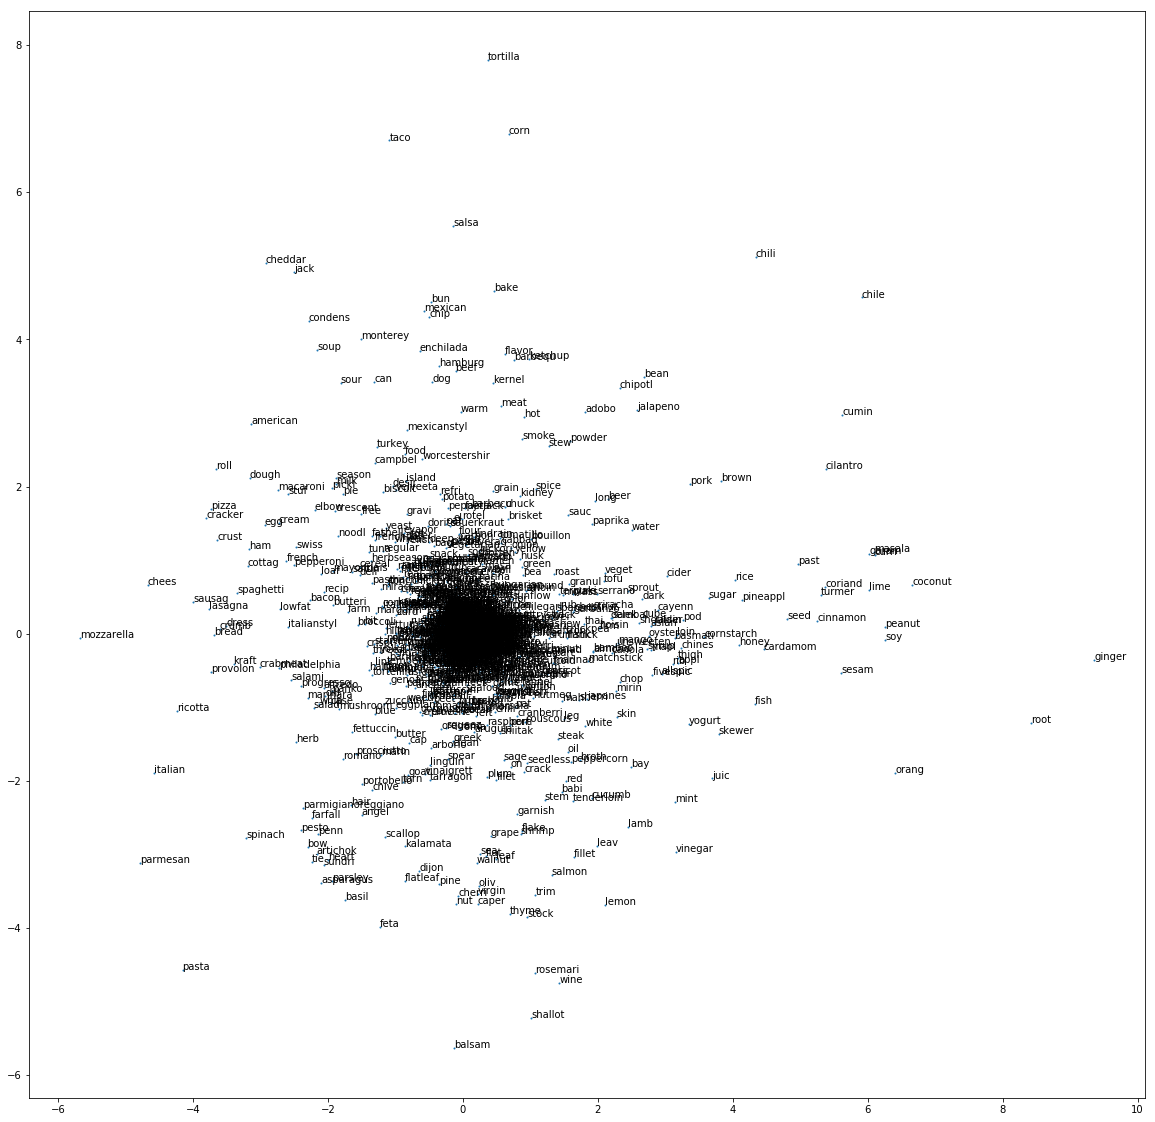

In [206]:
wordvecs = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(wordvecs)
plt.figure(figsize=(20,20))
plt.scatter(result[:,0],result[:,1],s=1)

words = list(model.wv.vocab)
for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))


In [208]:
recipetext_db.to_csv('ingreds_db_cleaned.csv')
recipetext_db.head()

,ingredients
1 dish chicken parmesan,batter mazola flour fleischmann yeast sugar sa...
1 dish pepperoni cheese pizza bake,batter mazola flour fleischmann yeast sugar sa...
1 pea salad most requested,petit pea smokeflavor almond onion mayonnais g...
15 minute herbed chicken,veget oil chicken breast campbel condens cream...
2 step creamy chicken and pasta,veget oil chicken breast bag pasta veget campb...


In [7]:
recipe1 = 'white and gold pizza'
db = pd.read_csv('allrecipes_ingreds_db_all.csv')
db = db.drop(columns=['Unnamed: 0'])
db = db.set_index('recipename')

doc1 = nlp(recipetext_db.loc[recipe1].ingredients)
similarity = []
for num in range(0,len(recipetext_db)):
        similarity.append(doc1.similarity(nlp(recipetext_db.iloc[num].ingredients)))
similarity = np.array(similarity)
indices = (-similarity).argsort()[:10]
similarrecipes = recipetext_db.iloc[indices].index

print(db.loc[similarrecipes[:10]])

                                                                                                 ingredients
recipename                                                                                                  
white and gold pizza         3 tablespoons olive oil, divided                                               
white and gold pizza         1 large sweet onion, thinly sliced, separated into rings                       
white and gold pizza         1 pound frozen pizza dough, thawed                                             
white and gold pizza         1 large clove garlic, minced                                                   
white and gold pizza         4 ounces PHILADELPHIA Cream Cheese, softened                                   
white and gold pizza         3/4 cup KRAFT Shredded Mozzarella Cheese                                       
white and gold pizza         1/2 cup DIGIORNO Grated Romano Cheese                                          
white and gold pizz

In [3]:
#word vector model used to filter recipes by ingredient similarity
nlp = spacy.load('recipe_nutrition_app/app_data/recipe_ingred_word2vec_lg/')
recipetext_db = pd.read_csv('recipe_nutrition_app/app_data/ingreds_db_cleaned.csv').set_index('Unnamed: 0')
recipetext_db.head()

,ingredients
Unnamed: 0,
1 dish chicken parmesan,batter mazola flour fleischmann yeast sugar sa...
1 dish pepperoni cheese pizza bake,batter mazola flour fleischmann yeast sugar sa...
1 pea salad most requested,petit pea smokeflavor almond onion mayonnais g...
15 minute herbed chicken,veget oil chicken breast campbel condens cream...
2 step creamy chicken and pasta,veget oil chicken breast bag pasta veget campb...


In [6]:
#NLP validation: manual label on scale from 1 to 5, 5 being most similar in ingredients/functional similarity
pd.set_option('display.max_colwidth', -1)
recipenames = np.unique(db.index)
filter_on = []
score = []
numiter = 1
for num in range(0,numiter):
#     firstrecipe = recipenames[np.random.choice(np.arange(0,len(recipenames)),size=1)][0]
    firstrecipe = 'pepperoni penne'
    applyfilt = np.random.choice([0,0],size=1)[0]
    filter_on.append(applyfilt)
    if applyfilt == 1:
        doc1 = nlp(recipetext_db.loc[firstrecipe].ingredients)
        similarity = []
        for idx in range(0,len(recipetext_db)):
            similarity.append(doc1.similarity(nlp(recipetext_db.iloc[idx].ingredients)))
        similarity = np.array(similarity)
        index = (-similarity).argsort()[1]
        secondrecipe = recipetext_db.iloc[index].name
        print(db.loc[[firstrecipe,secondrecipe]])
        score.append(int(input("similarity (1-5):")))
    else:
        secondrecipe = recipenames[np.random.choice(np.arange(0,len(recipenames)),size=1)][0]
        while secondrecipe == firstrecipe:
            secondrecipe = recipenames[np.random.choice(np.arange(0,len(recipenames)),size=1)][0]
        print(db.loc[[firstrecipe,secondrecipe]])
        score.append(int(input("similarity (1-5):")))
    clear_output()


In [317]:
print(filter_on)
print(score)

[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0]
[5, 4, 3, 2, 1, 5, 1, 1, 3, 4, 1, 4, 4, 3, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 3, 3, 1, 2, 1, 4, 1, 3, 5, 5, 1, 1, 1, 1, 4, 2, 3, 1, 1, 4, 1, 4, 1, 5, 1, 1, 5, 1, 1, 1, 3, 3, 1, 1, 3, 4, 1, 1, 1, 5, 1, 1, 1, 5, 5, 2, 3, 1, 4, 1, 5, 5, 1, 1, 1, 1, 1, 4, 2, 5, 1, 2, 1, 5, 3, 3, 1, 5, 1, 5, 1, 1, 5, 4, 4, 1]


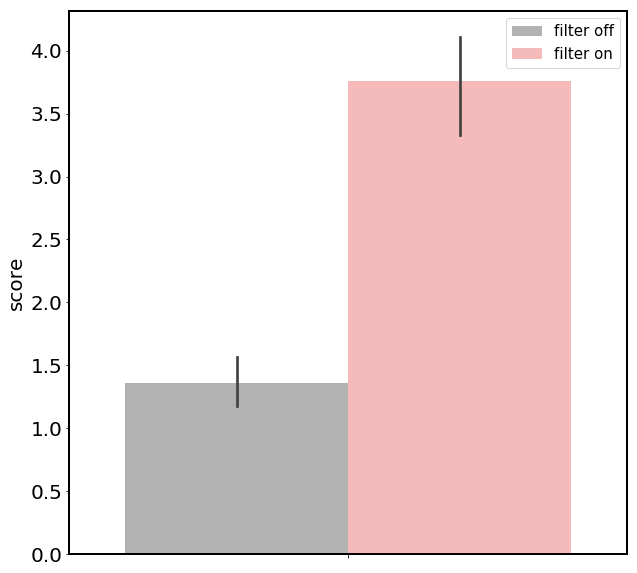

In [351]:
nlpvalidation = pd.DataFrame({'filter':filter_on,'scores':score})
plt.figure(figsize=(10,10))
ax=plt.gca()
g = sns.barplot(x="variable",y="value",hue="filter",data = nlpvalidation.melt(id_vars='filter'),palette=['k','r'],alpha=0.3)
ax.tick_params(labelsize=20)
plt.ylabel('score',fontsize=20)
plt.xlabel('')
ax.set_xticklabels('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['filter off','filter on'],fontsize=15)
plt.savefig('nlpvalidation.png',dpi=300)
nlpvalidation.to_csv('nlpvalidation.csv')

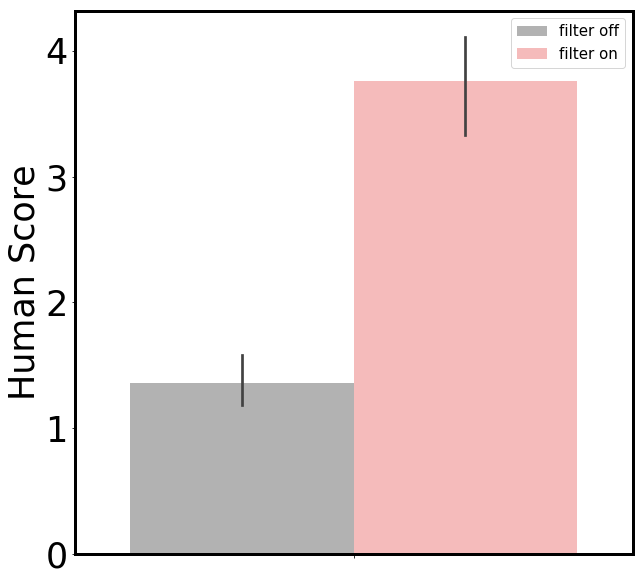

In [46]:
nlpvalidation = pd.read_csv('nlpvalidation.csv').drop(columns='Unnamed: 0')

plt.figure(figsize=(10,10))
ax=plt.gca()
g = sns.barplot(x="variable",y="value",hue="filter",data = nlpvalidation.melt(id_vars='filter'),palette=['k','r'],alpha=0.3)
ax.tick_params(labelsize=35)
plt.ylabel('Human Score',fontsize=35)
plt.xlabel('')
ax.set_xticklabels('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['filter off','filter on'],fontsize=15)
plt.savefig('nlpvalidation.png',dpi=300,bbox_inches="tight")